# GridSearchCV


GridSearchCV is a technique for hyperparameter tuning in machine learning, which involves searching for the best set of hyperparameters that result in the optimal performance of a model.

In GridSearchCV, a set of hyperparameters and their respective values are predefined, and the algorithm evaluates the performance of the model for each combination of these hyperparameters. The evaluation is typically done using cross-validation, where the dataset is split into several folds, and the model is trained on a portion of the data and tested on the remaining part. This helps to avoid overfitting and provides a more reliable estimate of the model's performance.

GridSearchCV exhaustively searches over all the possible hyperparameter combinations, and returns the combination that produces the best performance on the validation data. The performance metric used for evaluation can be specified by the user, and can vary depending on the problem at hand.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os

In [13]:
# Importing the training and testing sets from the KNN file
import pickle

# Load the data from the file
with open('data.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

In [17]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from termcolor import colored

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))

In [18]:
# gini: measures impurity by calculating the probability of misclassifying a randomly chosen data point in that node
# entropy: measures impurity by calculating the entropy of the class
# This model will try both criterions to decide on how to split the decision tree

# The grid search will also try different values of the maximum depth of the decision tree (2, 4, 6, 8)
params = {'criterion': ['gini', 'entropy'], 
          'max_depth': [2, 4, 6, 8]
         }

params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}

In [22]:
from sklearn.model_selection import GridSearchCV

estimator = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)
estimator.fit(X_train, Y_train)

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.898 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.890 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.894 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.890 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.885 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.968 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.968 total time=   0.0s
[CV 6/6] END n_neigh

[CV 3/6] END n_neighbors=30, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=uniform;, score=0.853 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=uniform;, score=0.849 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.973 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.969 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.969 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.961 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.845 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.859 total time=   0.0

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [29]:
Y_pred = estimator.predict(X_test)

In [23]:
# Let's see what the best parameters are based on the estimator:

estimator.best_params_

{'n_neighbors': 35, 'p': 1, 'weights': 'distance'}

In [24]:
# What about the best score?

estimator.best_score_

0.9693548548133369

In [26]:
report(estimator.best_estimator_, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.99      0.98      0.98      5065
   Low-Rated       0.90      0.95      0.92      1071
Medium-Rated       0.99      0.99      0.99     22743

    accuracy                           0.99     28879
   macro avg       0.96      0.97      0.97     28879
weighted avg       0.99      0.99      0.99     28879



### Classification report - train set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 99% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 99% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 90% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 98% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 99% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 95% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.98
* **Medium-Rated class** - 0.99
* **Low-Rated class** - 0.92

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 5065
* **Medium-Rated class** - 22743
* **Low-Rated class** - 1071


### <u> Accuracy: 99% </u>

In [27]:
report(estimator.best_estimator_, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.96      0.94      0.95      1764
   Low-Rated       0.85      0.89      0.87       336
Medium-Rated       0.98      0.98      0.98      7527

    accuracy                           0.97      9627
   macro avg       0.93      0.94      0.93      9627
weighted avg       0.97      0.97      0.97      9627



### Classification report - test set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 96% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 98% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 85% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 94% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 98% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 89% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.95
* **Medium-Rated class** - 0.98
* **Low-Rated class** - 0.87

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 1764
* **Medium-Rated class** - 7527
* **Low-Rated class** - 336


### <u> Accuracy: 97% </u>

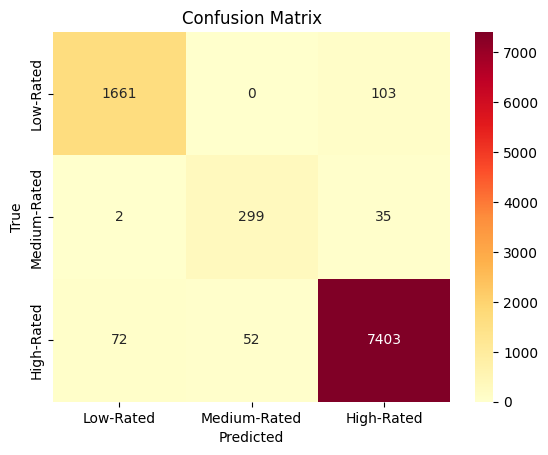

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Class labels
labels = ['Low-Rated', 'Medium-Rated', 'High-Rated']  

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [32]:
cm

array([[1661,    0,  103],
       [   2,  299,   35],
       [  72,   52, 7403]], dtype=int64)

### Confusion matrix

##### For the Low-Rated class:
* 1661 samples were correctly predicted as Low-Rated
* 0 samples were predicted as Medium-Rated but were actually Low-Rated
* 103 samples were predicted as High-Rated but were actually Low-Rated

##### For the Medium-Rated class:
* 2 samples were predicted as Low-Rated but were actually Medium-Rated
* 299 samples were correctly predicted as Medium-Rated 
* 35 samples were predicted as High-Rated but were actually Medium-Rated 

##### For the High-Rated class:
* 72 samples were predicted as Low-Rated but were actually High-Rated
* 52 samples were predicted as Medium-Rated but were actually High-Rated
* 7403 samples were correctly predicted as High-Rated
